<a href="https://colab.research.google.com/github/Mythreyan18/StrokePrediction/blob/main/StrokePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns

In [25]:
import pandas as pd
df = pd.read_csv("/content/sample_data/health.csv")

In [26]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [27]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [28]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [29]:
df.shape


(5110, 12)

In [30]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [31]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [32]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [33]:
employee=df.drop(['ever_married','work_type','Residence_type','smoking_status'],axis=1)

In [34]:
import numpy as np
employee['bmi']=employee['bmi'].fillna(employee['bmi'].mean())
employee.isnull().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64

In [35]:
employee.head()

,id,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,Male,67.0,0,1,228.69,36.600000,1
1,51676,Female,61.0,0,0,202.21,28.893237,1
2,31112,Male,80.0,0,1,105.92,32.500000,1
3,60182,Female,49.0,0,0,171.23,34.400000,1
4,1665,Female,79.0,1,0,174.12,24.000000,1


In [36]:
import seaborn as sns 
corelation=employee.corr()

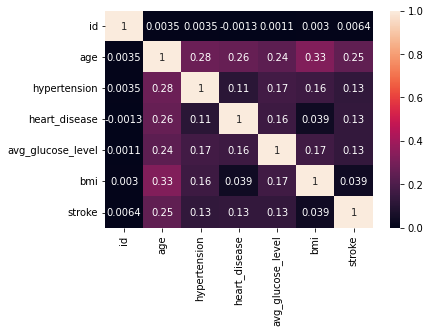

In [37]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

In [38]:
x=employee.iloc[:,2:7].values
y=employee.iloc[:,7].values
print(x)
print(y)

[[ 67.           0.           1.         228.69        36.6       ]
 [ 61.           0.           0.         202.21        28.89323691]
 [ 80.           0.           1.         105.92        32.5       ]
 ...
 [ 35.           0.           0.          82.99        30.6       ]
 [ 51.           0.           0.         166.29        25.6       ]
 [ 44.           0.           0.          85.28        26.2       ]]
[1 1 1 ... 0 0 0]


In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
print(x_train.shape)

(3832, 5)


In [40]:
from sklearn.preprocessing import *
scaler=MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.fit_transform(x_test)

In [41]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [42]:
model.fit(x_train,y_train)

LogisticRegression()

In [43]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
y_pred=model.predict(x_test)

y_test

array([1, 0, 0, ..., 0, 0, 0])

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

94.91392801251956

In [46]:
a=model.predict([[45,1,0,200,35]])
print(a)

[1]


In [47]:
if a==1:
  print("You have Stroke")
else:
  print("You are healthy")

You have Stroke
